This notebook demonstrates some basic statistical principles - mean, median, mode, range, variance, and standard deviation.

In [3]:
# Import the required packages, 
# with their conventional names 
import matplotlib.pyplot as plt 
import numpy as np 
import scipy.stats as stats 

In [4]:
# Generate some data ... 10000 samples chosen from a Gaussian distribution with a mean of 100 and a sigma of 10.
npts = 10000
mu = 100.0
sigma = 10.0

x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)

print (x)

[ 90.04689367  88.26560745  98.93215961 ...  92.98723613  99.20014171
 112.89823924]


(array([  1.,   0.,   0.,   1.,   1.,   1.,   5.,   5.,   4.,   3.,   5.,
          9.,   7.,   8.,  11.,  15.,  17.,  22.,  18.,  22.,  34.,  39.,
         24.,  48.,  40.,  45.,  71.,  78.,  76.,  89.,  99., 100., 125.,
        136., 145., 161., 169., 169., 202., 216., 214., 210., 236., 267.,
        247., 252., 265., 226., 268., 271., 288., 264., 271., 271., 260.,
        249., 259., 251., 252., 237., 237., 204., 176., 203., 158., 183.,
        164., 146., 130., 119., 118., 107., 100.,  84.,  82.,  71.,  62.,
         51.,  50.,  32.,  42.,  38.,  27.,  27.,  17.,  18.,  16.,  15.,
          6.,   5.,   7.,   8.,   5.,   2.,   3.,   3.,   2.,   0.,   1.,
          2.]),
 array([ 64.61531413,  65.30761525,  65.99991637,  66.69221749,
         67.3845186 ,  68.07681972,  68.76912084,  69.46142196,
         70.15372308,  70.84602419,  71.53832531,  72.23062643,
         72.92292755,  73.61522866,  74.30752978,  74.9998309 ,
         75.69213202,  76.38443314,  77.07673425,  77.76903537

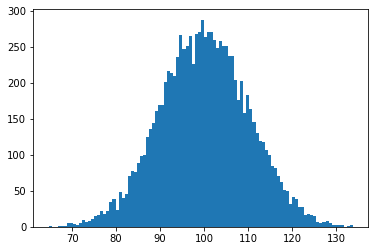

In [5]:
# Plot a histogram of the data
numbins = 100
plt.hist(x, bins=numbins)

# The information printed out is as follows:
#
# The first array is the number of entries in each bin.
# The second array gives the x-values of the EDGES of the bins, which are
# determined automatically by matplotlib.pyplot/numpy.  Thus, there are (numbins+1) values in this array.

In [6]:
# calculate the sample mean ... this is the mathematical average of the all of the data points.
# Note that this number is not exactly 100!  The reason is that the sample mean is an ESTIMATE
# of the true mean (100.0) which is based on the actual data.

xbar = np.mean(x)
print ("Sample mean = ",xbar)

print()
print ("I wonder how many of those decimal places are meaningful?")

Sample mean =  100.06717205034798

I wonder how many of those decimal places are meaningful?


In [7]:
# calculate the sample median ... this is the value of x that has as many points below as above.  For a symmetric
# distribution like the Gaussian, we would expect the mean and median to be the same number.
#
# Note that they are NOT the same number, precisely!  The median is thus another ESTIMATE of the true mean (100.0).

xmed = np.median(x)
print ("Sample median = ",xmed)

Sample median =  100.02164845470375


In [8]:
# calculate the sample mode ... The mode is the value of x that is the "most popular".  If we look at the plot
# plot above, that would correspond to the bin with the largest number of counts in it.  But, of course, that 
# is dependent on how we bin the data, right?  So, calculating the mode is a bit more complicated than calculating
# the mean or the median.  In other words, our estimate of the value of the mode depends on HOW WE BIN THE DATA!!!!
#
# For a symmetric distribution, like the Gaussian, the mode is yet another ESTIMATE of the true mean (100.0).
# For an asymmetric distribution, the sample mean, sample median, and sample mode can be quite different numbers!

# We start by creating a histogram ARRAY (which was actually done behind the scenes for creating the plot above)

xhist = np.histogram(x,numbins)
print(xhist[0],xhist[1])

# xhist[0] contains the number of entries in each bin
# xhist[1] contains the x-values of the EDGES of the bins.  This means that there are (numbins+1) elements in
# this array.
#
# Next, we find the index of the bin that has the maximum entries:

index = np.where(xhist[0] == np.amax(xhist[0]))
print (index[0])

# Finally, we find the mode by calculating the central value of the bin associated with the maximum entries.

xmode = (xhist[1][index[0]] + xhist[1][index[0]+1])/2.0

print ("Sample mode = ",xmode)


[  1   0   0   1   1   1   5   5   4   3   5   9   7   8  11  15  17  22
  18  22  34  39  24  48  40  45  71  78  76  89  99 100 125 136 145 161
 169 169 202 216 214 210 236 267 247 252 265 226 268 271 288 264 271 271
 260 249 259 251 252 237 237 204 176 203 158 183 164 146 130 119 118 107
 100  84  82  71  62  51  50  32  42  38  27  27  17  18  16  15   6   5
   7   8   5   2   3   3   2   0   1   2] [ 64.61531413  65.30761525  65.99991637  66.69221749  67.3845186
  68.07681972  68.76912084  69.46142196  70.15372308  70.84602419
  71.53832531  72.23062643  72.92292755  73.61522866  74.30752978
  74.9998309   75.69213202  76.38443314  77.07673425  77.76903537
  78.46133649  79.15363761  79.84593873  80.53823984  81.23054096
  81.92284208  82.6151432   83.30744432  83.99974543  84.69204655
  85.38434767  86.07664879  86.76894991  87.46125102  88.15355214
  88.84585326  89.53815438  90.2304555   90.92275661  91.61505773
  92.30735885  92.99965997  93.69196109  94.3842622   95.07656332


In [9]:
# calculate the sample range ... this is the difference between the max and min values.

xrange = np.ptp(x)
print ("Sample range = ",xrange)

Sample range =  69.23011179519284


In [10]:
# calculate the sample variance and sample standard deviation
#
# NOTE:  the default variance and stdev methods in numpy calculate the BIASED versions!!! Yikes!!!! In general,
#        you should not use these!!!

variance = np.var(x)
stdev = np.std(x)

print ("Biased Sample Variance = ",variance)
print ("Biased Sample Standard Deviation = ",stdev)

# Calculate the UNBIASED variance and standard deviations.  

variance = np.var(x,ddof=1)
stdev = np.std(x,ddof=1)

print ("Unbiased Sample Variance = ",variance)
print ("Unbiased Sample Standard Deviation = ",stdev)

Biased Sample Variance =  100.3803318325624
Biased Sample Standard Deviation =  10.018998544393666
Unbiased Sample Variance =  100.39037086964937
Unbiased Sample Standard Deviation =  10.019499531895262


In [11]:
# calculate the biased (N), unbiased (N-1), and overly biased (N-2) variances by hand:

vsum = 0.0
for i in range(len(x)):
    vsum = vsum + (x[i]-xbar)**2
    
variance_b = vsum/npts
variance_ub = vsum/(npts-1)
variance_ob = vsum/(npts-2)

print ("Variances = ",variance_b,variance_ub,variance_ob)

print ("Std. Devs = ",np.sqrt(variance_b),np.sqrt(variance_ub),np.sqrt(variance_ob))

Variances =  100.38033183256285 100.3903708696498 100.40041191494583
Std. Devs =  10.018998544393689 10.019499531895283 10.020000594558157


8.421661681645206 9.415704001831937 10.87231848013501


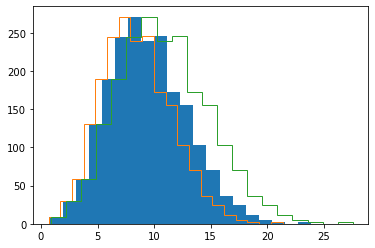

In [12]:
# write a loop to calculate the biased, unbiased, and overly biased variances/stdevs of a series of many samples,
# for comparision with one another

# create some lists to hold the sample standard deviations at each iteration of the loop
sb = []
sub = []
sob = []

# do the experiment 2000 times
for j in range(2000):
    # Sample a Gaussian with mean of 100.0 and a standard deviation of 10.0 ... 5 times.
    npts = 5
    mu = 100.0
    sigma = 10.0

    x = stats.norm.rvs(size=npts,loc=mu,scale=sigma)
    
    # calculate the sample mean (5 samples)
    xbar = np.mean(x)

    # calculate the variance by hand
    vsum = 0.0
    for i in range(len(x)):
        vsum = vsum + (x[i]-xbar)**2
    
    # calculate the variance in three ways - biased (N), unbiased (N-1), and overly biased (N-2)
    variance_b = vsum/npts
    variance_ub = vsum/(npts-1)
    variance_ob = vsum/(npts-2)

    # calculate the standard deviation three ways
    sb.append(np.sqrt(variance_b))
    sub.append(np.sqrt(variance_ub))
    sob.append(np.sqrt(variance_ob))

# convert this lists to numpy arrays
sb = np.array(sb)
sub = np.array(sub)
sob = np.array(sob)

# plot histograms of the standard deviations for all 2000 experiments
# The unbiased version is plotted in solid blue, and the others are plotted as line plots for better visualization.
#
plt.hist(sub,bins=20)
plt.hist(sb,bins=20,histtype='step')
plt.hist(sob,bins=20,histtype='step')

# compare the means of the calculated standard deviations ... NOTE:  The UNBIASED method gives the best estimate!
print(np.mean(sb),np.mean(sub),np.mean(sob))